<a href="https://colab.research.google.com/github/Math-maz/projeto_final_IC/blob/main/projeto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd

uri = "https://raw.githubusercontent.com/Math-maz/projeto_final_IC/main/MICRODADOS_ENEM_2018_SAMPLE_43278.csv"
dados = pd.read_csv(uri)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


In [48]:
print(dados.columns.values)

['NU_INSCRICAO' 'NU_ANO' 'CO_MUNICIPIO_RESIDENCIA'
 'NO_MUNICIPIO_RESIDENCIA' 'CO_UF_RESIDENCIA' 'SG_UF_RESIDENCIA'
 'NU_IDADE' 'TP_SEXO' 'TP_ESTADO_CIVIL' 'TP_COR_RACA' 'TP_NACIONALIDADE'
 'CO_MUNICIPIO_NASCIMENTO' 'NO_MUNICIPIO_NASCIMENTO' 'CO_UF_NASCIMENTO'
 'SG_UF_NASCIMENTO' 'TP_ST_CONCLUSAO' 'TP_ANO_CONCLUIU' 'TP_ESCOLA'
 'TP_ENSINO' 'IN_TREINEIRO' 'CO_ESCOLA' 'CO_MUNICIPIO_ESC'
 'NO_MUNICIPIO_ESC' 'CO_UF_ESC' 'SG_UF_ESC' 'TP_DEPENDENCIA_ADM_ESC'
 'TP_LOCALIZACAO_ESC' 'TP_SIT_FUNC_ESC' 'IN_BAIXA_VISAO' 'IN_CEGUEIRA'
 'IN_SURDEZ' 'IN_DEFICIENCIA_AUDITIVA' 'IN_SURDO_CEGUEIRA'
 'IN_DEFICIENCIA_FISICA' 'IN_DEFICIENCIA_MENTAL' 'IN_DEFICIT_ATENCAO'
 'IN_DISLEXIA' 'IN_DISCALCULIA' 'IN_AUTISMO' 'IN_VISAO_MONOCULAR'
 'IN_OUTRA_DEF' 'IN_GESTANTE' 'IN_LACTANTE' 'IN_IDOSO'
 'IN_ESTUDA_CLASSE_HOSPITALAR' 'IN_SEM_RECURSO' 'IN_BRAILLE'
 'IN_AMPLIADA_24' 'IN_AMPLIADA_18' 'IN_LEDOR' 'IN_ACESSO' 'IN_TRANSCRICAO'
 'IN_LIBRAS' 'IN_LEITURA_LABIAL' 'IN_MESA_CADEIRA_RODAS'
 'IN_MESA_CADEIRA_SEPARADA' '

In [49]:
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

In [50]:
dados.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,"137,844.00","137,844.00","137,844.00","137,844.00","137,843.00","132,485.00","137,844.00","137,844.00","133,140.00","133,140.00","137,844.00","137,844.00","137,844.00","86,900.00","137,844.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00",...,"137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,838.00","137,838.00","137,838.00","137,838.00","97,537.00","103,774.00","103,774.00","97,537.00","97,537.00","103,774.00","103,774.00","97,537.00","137,844.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","137,844.00"
mean,"180,010,423,553.31","2,018.00","3,118,377.40",31.03,22.38,0.12,2.12,1.04,"3,085,664.65",30.70,1.54,3.00,1.34,1.20,0.10,"31,587,077.66","3,160,970.21",31.45,2.31,1.03,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,119,912.84",31.05,0.71,0.75,0.75,0.71,448.51,452.52,456.51,460.50,493.63,568.31,526.59,535.18,0.53,1.10,121.73,101.70,97.18,117.03,71.50,509.13,3.90
std,"1,918,950.00",0.00,"994,483.04",9.92,7.61,0.38,1.02,0.23,"975,680.73",9.72,0.72,4.00,0.70,0.60,0.29,"9,765,074.33","979,871.51",9.77,0.78,0.18,0.12,0.03,0.01,0.02,0.02,0.00,0.04,0.02,0.03,0.01,0.01,0.01,0.02,0.03,0.02,0.03,0.00,0.00,0.04,0.01,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,"994,800.12",9.92,0.46,0.43,0.43,0.46,1.21,1.33,1.31,1.14,74.18,81.03,73.02,102.83,0.50,0.69,31.32,49.51,47.00,35.20,52.21,187.01,1.51
min,"180,007,186,686.00","2,018.00","1,100,015.00",11.00,13.00,0.00,0.00,0.00,"1,100,015.00",11.00,1.00,0.00,1.00,1.00,0.00,"11,000,058.00","1,100,015.00",11.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,100,015.00",11.00,0.00,0.00,0.00,0.00,447.00,451.00,455.00,459.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"180,008,761,760.75","2,018.00","2,409,100.00",24.00,18.00,0.00,1.00,1.00,"2,408,102.00",24.00,1.00,0.00,1.00,1.00,0.00,"24,328,308.00","2,414,407.00",24.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [51]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagens', 'matematica', 'redacao']
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagens,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [52]:
corr = dados_notas.corr()
corr

,ciencias_naturais,ciencias_humanas,linguagens,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagens,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


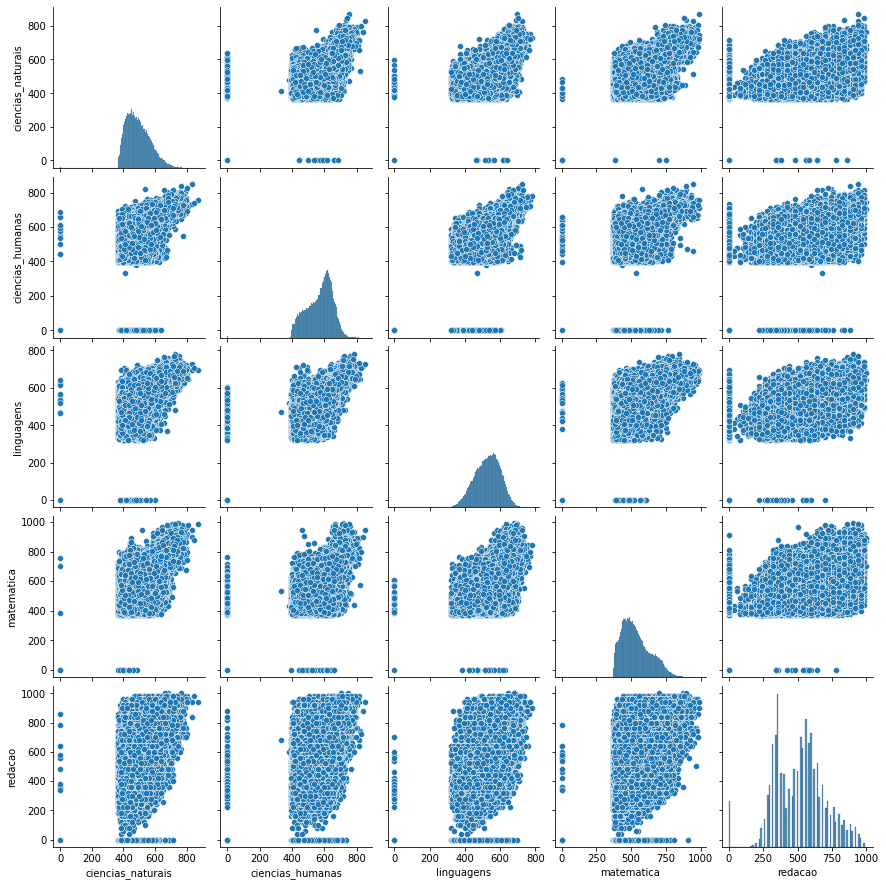

In [53]:
import seaborn as sns
sns.pairplot(dados_notas)

In [54]:
x = dados_notas[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']]
x.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
1,523.10,671.30,738.00,680.00
2,409.20,531.70,438.10,600.00
3,452.30,505.50,544.90,400.00
6,428.50,505.20,436.80,560.00
8,491.80,575.70,487.60,660.00


In [55]:
y_adivinhar = dados_notas['linguagens']
y_adivinhar

1        661.60
2        389.00
3        448.50
6        521.00
8        524.40
          ...  
137835   504.80
137836   528.50
137838   538.30
137840   468.10
137842   527.70
Name: linguagens, Length: 97270, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(43267)
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y_adivinhar, random_state = 326784)

print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(72952, 4)
(24318, 4)
(72952,)
(24318,)


In [57]:
from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [58]:
predicoes_notas_linguagem = modelo.predict(x_teste)
predicoes_notas_linguagem[:5] ##valores chutando pela IA

array([521.5, 610.1, 700.3, 576.3, 442.1])

In [59]:
y_teste[:5] ##valores reais usados no teste

67300    577.20
113766   624.40
48328    703.00
9454     598.60
9515     458.60
Name: linguagens, dtype: float64

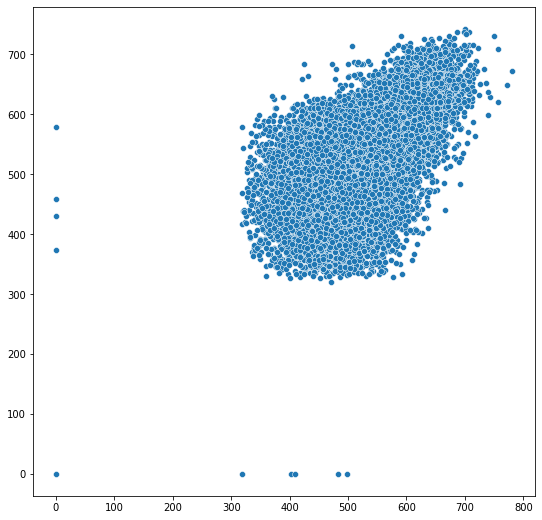

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)



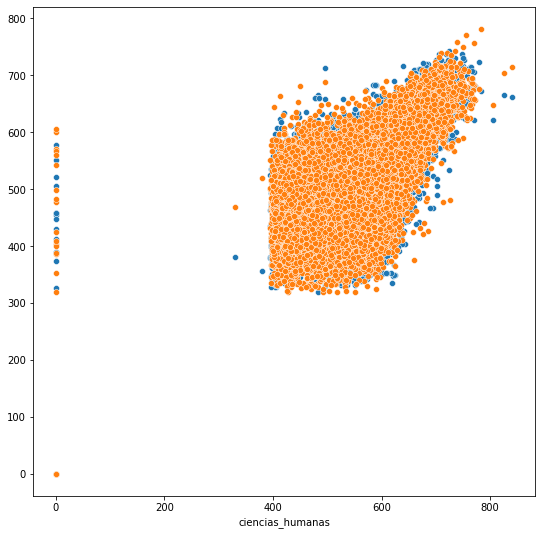

In [61]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=x_teste['ciencias_humanas'], y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste['ciencias_humanas'], y=y_teste.values)

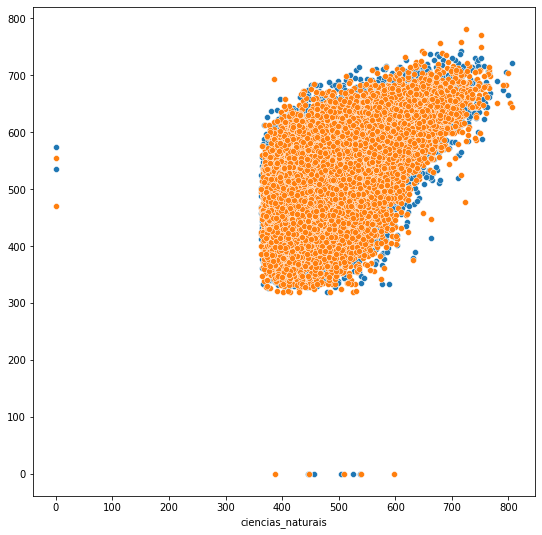

In [62]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=x_teste['ciencias_naturais'], y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste['ciencias_naturais'], y=y_teste.values)

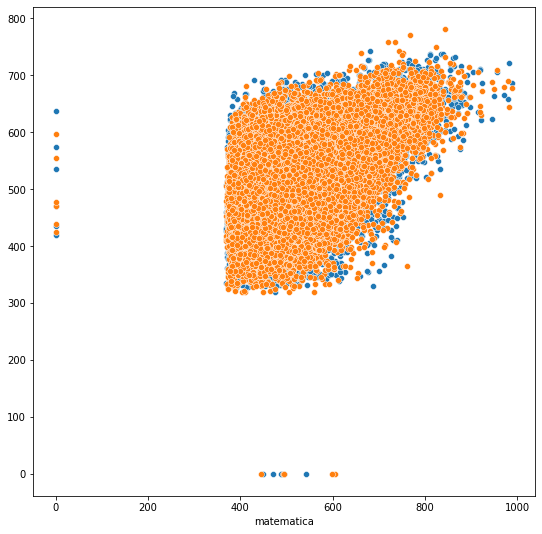

In [63]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=x_teste['matematica'], y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste['matematica'], y=y_teste.values)

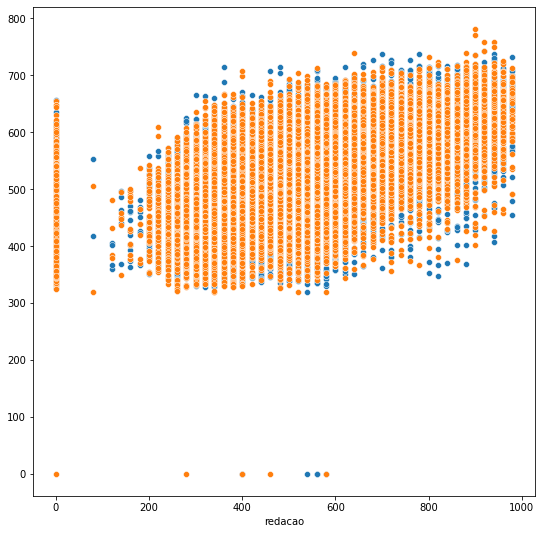

In [64]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=x_teste['redacao'], y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste['redacao'], y=y_teste.values)

In [65]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, predicoes_notas_linguagem)

4151.86

In [66]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

mean_squared_error(y_teste, dummy_predicoes)

5137.48